# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Modeling
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Config
%matplotlib inline
pd.set_option('display.float_format', '{:.2f}'.format)

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# Membaca dataset
df = pd.read_csv("marketing_campaign.csv")

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# Preview data
print("5 DATA PERTAMA:\n")
display(df.head())

5 DATA PERTAMA:



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.00,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.00,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.00,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.00,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.00,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


Generalisasi dari nama-nama kolom:

1. Year_Birth: Tahun kelahiran pelanggan.
2. Education: Tingkat pendidikan pelanggan.
3. Marital_Status: Status pernikahan pelanggan.
4. Income: Pendapatan tahunan pelanggan.
5. Kidhome: Jumlah anak kecil yang tinggal bersama pelanggan.
6. Teenhome: Jumlah remaja yang tinggal bersama pelanggan.
7. Recency: Jumlah hari sejak transaksi terakhir pelanggan.
8. MntWines: Total pengeluaran untuk produk anggur.
9. MntFruits: Total pengeluaran untuk produk buah-buahan.
10. MntMeatProducts: Total pengeluaran untuk produk daging.
11. MntFishProducts: Total pengeluaran untuk produk ikan.
12. MntSweetProducts: Total pengeluaran untuk produk manisan.
13. MntGoldProds: Total pengeluaran untuk produk emas.
14. NumDealsPurchases: Jumlah pembelian dengan diskon.
15. NumWebPurchases: Jumlah pembelian melalui web.
16. NumCatalogPurchases: Jumlah pembelian melalui katalog.
17. NumStorePurchases: Jumlah pembelian di toko fisik.
18. NumWebVisitsMonth: Jumlah kunjungan ke situs web dalam sebulan.
19. Complain: Indikator apakah pelanggan pernah mengajukan keluhan (1: ya, 0: tidak).

In [4]:
# Menampilkan informasi tentang struktur dataset
print("INFORMASI DATASET:\n")
print(df.info())

INFORMASI DATASET:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases 

In [5]:
# Drop kolom tidak relevan
df = df.drop(['ID',  
              'AcceptedCmp1', 
              'AcceptedCmp2', 
              'AcceptedCmp3', 
              'AcceptedCmp4', 
              'AcceptedCmp5', 
              'Z_CostContact', 
              'Z_Revenue', 
              'Response',
              'Complain'], axis=1, errors='ignore')

In [6]:
# Menampilkan jumlah total NaN dalam dataset
print("JUMLAH NULL SETIAP KOLOM:\n", df.isnull().sum())
print("\nTOTAL NULL:\n", df.isnull().sum().sum())

JUMLAH NULL SETIAP KOLOM:
 Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
dtype: int64

TOTAL NULL:
 24


In [7]:
# Menampilkan jumlah duplikat
print("JUMLAH DUPLIKAT:\n", df.duplicated().sum())

JUMLAH DUPLIKAT:
 201


In [8]:
# Statistika deskriptif kolom numerik
# Pilih hanya kolom numerik
df_numerik = df.select_dtypes(include=['int64', 'float64']).copy()

# Menampilkan statistik deskriptif untuk kolom numerik asli
print("STATISTIKA DESKRIPTIF KOLOM NUMERIK:\n")
print(df_numerik.describe())

STATISTIKA DESKRIPTIF KOLOM NUMERIK:

       Year_Birth    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
count     2240.00   2216.00  2240.00   2240.00  2240.00   2240.00    2240.00   
mean      1968.81  52247.25     0.44      0.51    49.11    303.94      26.30   
std         11.98  25173.08     0.54      0.54    28.96    336.60      39.77   
min       1893.00   1730.00     0.00      0.00     0.00      0.00       0.00   
25%       1959.00  35303.00     0.00      0.00    24.00     23.75       1.00   
50%       1970.00  51381.50     0.00      0.00    49.00    173.50       8.00   
75%       1977.00  68522.00     1.00      1.00    74.00    504.25      33.00   
max       1996.00 666666.00     2.00      2.00    99.00   1493.00     199.00   

       MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
count          2240.00          2240.00           2240.00       2240.00   
mean            166.95            37.53             27.06         44.02   
std             

In [9]:
# Statistik deskriptif kolom ketegorikal
df_kategorik = df[['Education', 'Marital_Status']]

print("STATISTIKA DESKRIPTIF KOLOM KATEGORIKAL:\n")
display(df_kategorik.describe())

STATISTIKA DESKRIPTIF KOLOM KATEGORIKAL:



,Education,Marital_Status
count,2240,2240
unique,5,8
top,Graduation,Married
freq,1127,864


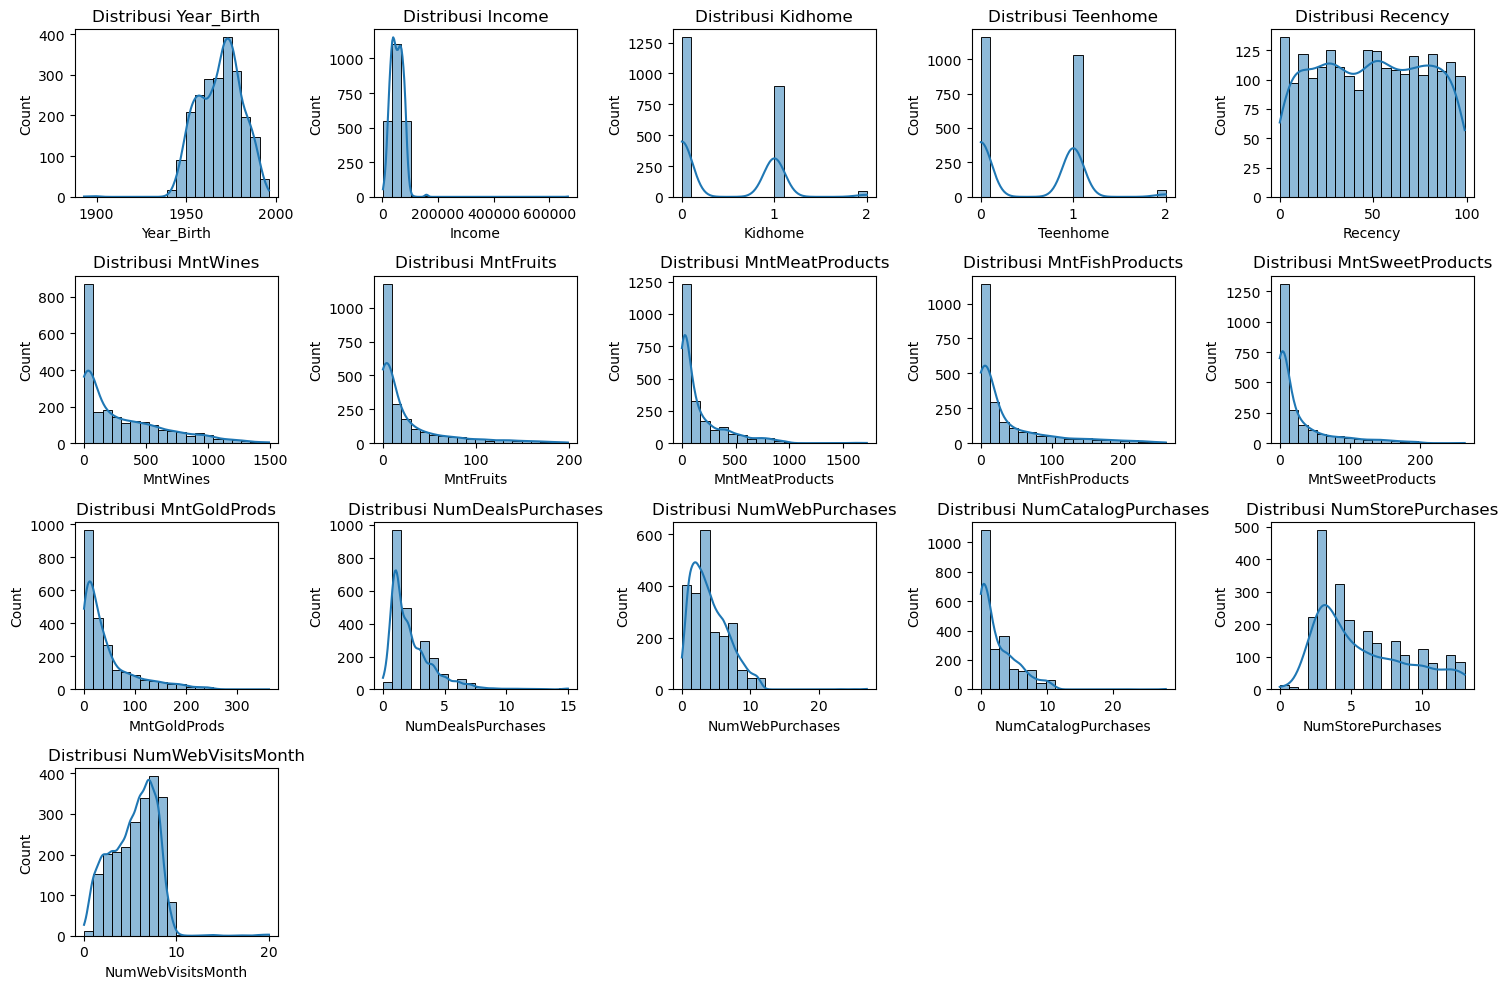

In [10]:
# Visualisasi kolom numerik
# Pilih hanya kolom numerik
df_numerik = df.select_dtypes(include=['int64', 'float64']).copy()

# Tentukan jumlah subplot sesuai jumlah kolom numerik
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_numerik.columns, 1):
    plt.subplot(4, 5, i) 
    sns.histplot(df_numerik[col], kde=True, bins=20)
    plt.title(f'Distribusi {col}')

plt.tight_layout()
plt.show()

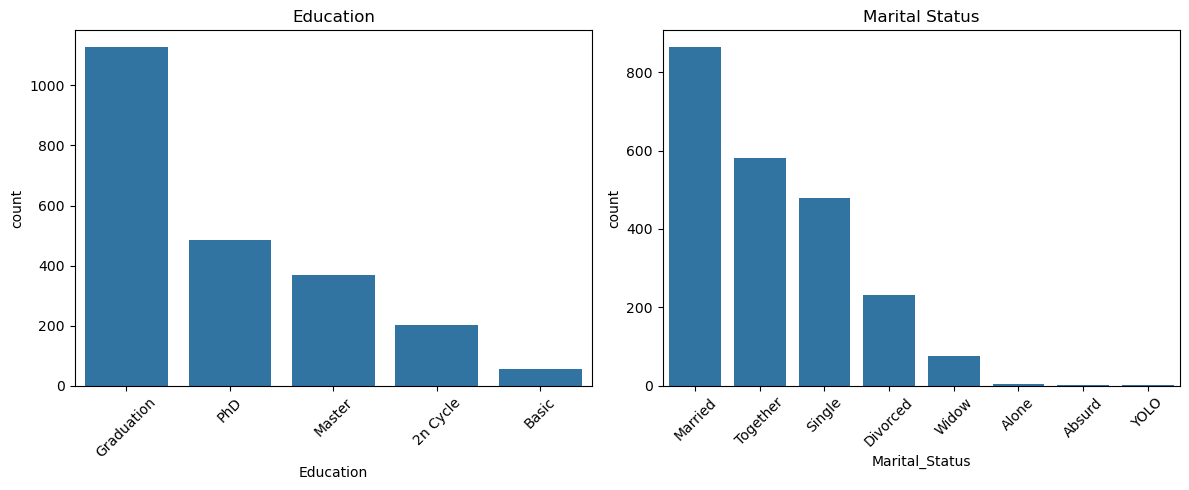

In [11]:
# Visualisasi kolom kategorikal
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(data=df, x='Education', order=df['Education'].value_counts().index)
plt.title('Education')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.countplot(data=df, x='Marital_Status', order=df['Marital_Status'].value_counts().index)
plt.title('Marital Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

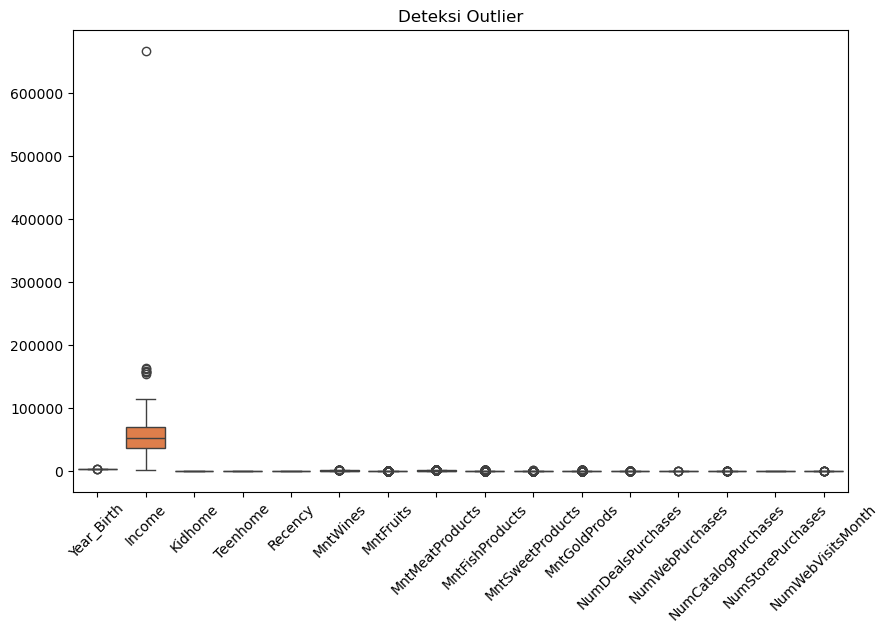

In [12]:
# Menangani outlier untuk kolom numerikal
# Pilih hanya kolom numerik
df_numerik = df.select_dtypes(include=['int64', 'float64']).copy()
plt.figure(figsize=(10,6))
sns.boxplot(data=df_numerik)
plt.title('Deteksi Outlier')
plt.xticks(rotation=45)
plt.show()

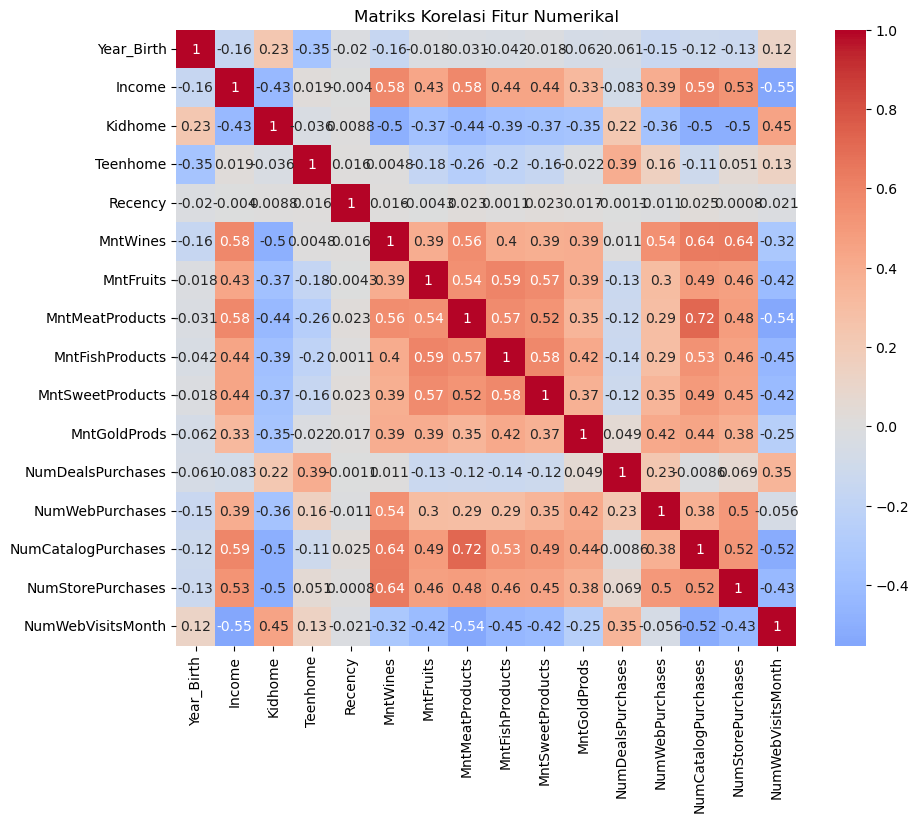

In [13]:
# Korelasi untuk kolom numerikal
# Pilih hanya kolom numerik
df_numerik = df.select_dtypes(include=['int64', 'float64']).copy()

corr_matrix = df_numerik.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriks Korelasi Fitur Numerikal')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [14]:
# Konversi tipe data
# # Konversi kolom tanggal
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="mixed")

#-------------------------------------------------------------------------------------------------------------------------------------------------------

# Tidak bisa pakai cara ini
# df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")
# df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%m/%d/%Y")

In [15]:
# Penanganan missing values
# Imputasi dengan mean
mean_income = df['Income'].mean()
df['Income'] = df['Income'].fillna(mean_income)

#-------------------------------------------------------------------------------------------------------------------------------------------------------

# Imputasi dengan median
# median_income = df['Income'].median()
# df['Income'] = df['Income'].fillna(median_income)

In [16]:
# Hapus duplikat
# df = df.drop_duplicates() # tidak perlu karena duplicates = 0

In [17]:
# Penanganan outliers
# Pilih hanya kolom numerik
df_numerik = df.select_dtypes(include=['int64', 'float64']).copy()

# copy dataset sebelum penanganan outlier
df_numerik_before = df_numerik.copy()

# Membuat batas dengan outlier
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR
    df[column] = np.clip(df[column], lower, upper)
    return df

# Perbaikan loop untuk menangani outlier
for col in df_numerik.columns:
    df_numerik = cap_outliers(df_numerik, col)

# Terapkan hasil penanganan outlier ke df asli
df[df_numerik.columns] = df_numerik
#-------------------------------------------------------------------------------------------------------------------------------------------------------
    
# Hapus outlier
# def remove_outliers(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

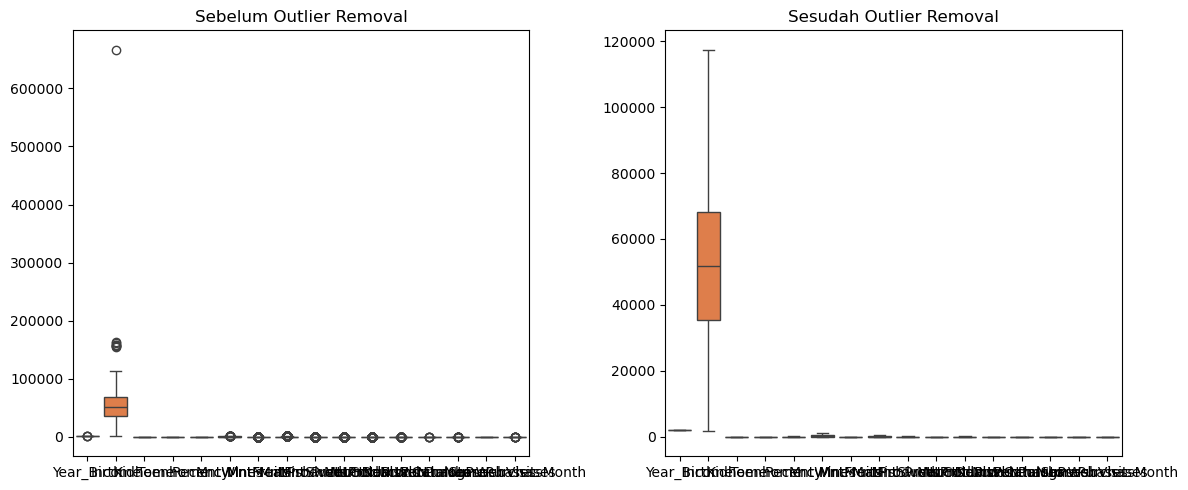

In [18]:
# Visualisasi outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Sebelum
sns.boxplot(data=df_numerik_before, ax=axes[0])
axes[0].set_title("Sebelum Outlier Removal")

# Sesudah
sns.boxplot(data=df_numerik, ax=axes[1])
axes[1].set_title("Sesudah Outlier Removal")

plt.tight_layout()
plt.show()

In [19]:
# Feature enginerring
# Usia customer
df['Age'] = datetime.now().year - df['Year_Birth']

# Total anak
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

# Total belanja semua kategori
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Preferensi kategori favorit (opsional untuk analisis, bukan untuk clustering)
df['Favorite_Category'] = df[['MntWines','MntFruits','MntMeatProducts',
                             'MntFishProducts','MntSweetProducts']].idxmax(axis=1).str.replace('Mnt','')

# Tenure_Days yang realistis
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])  # Convert ke datetime
current_date = df['Dt_Customer'].max()  # Gunakan tanggal terbaru di dataset
df['Tenure_Days'] = (current_date - df['Dt_Customer']).dt.days

# Total Store Visits per month
df['Total_Store_Visits'] = (df['NumDealsPurchases'] + 
                            df['NumWebPurchases'] + 
                            df['NumCatalogPurchases'] + 
                            df['NumStorePurchases'])  # Total visits berdasarkan durasi pelanggan terdaftar

#-------------------------------------------------------------------------------------------------------------------------------------------------------

# # Total Web Visits per month
# df['Total_Web_Visits'] = df['NumWebVisitsMonth'] * df['Tenure_Days']  # Aktivitas berdasarkan durasi pelanggan terdaftar

In [20]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Total_Children,Total_Spending,Favorite_Category,Tenure_Days,Total_Store_Visits
0,1957,Graduation,Single,58138.00,0,0,2012-04-09,58,635,81,...,8,10,4,7,68,0,1551.50,Wines,971,25
1,1954,Graduation,Single,46344.00,1,1,2014-08-03,38,11,1,...,1,1,2,5,71,2,27.00,Wines,125,6
2,1965,Graduation,Together,71613.00,0,0,2013-08-21,26,426,49,...,8,2,10,4,60,0,776.00,Wines,472,21
3,1984,Graduation,Together,26646.00,1,0,2014-10-02,26,11,4,...,2,0,4,6,41,1,53.00,MeatProducts,65,8
4,1981,PhD,Married,58293.00,1,0,2014-01-19,94,173,43,...,5,3,6,5,44,1,422.00,Wines,321,19


**Catatan:** Jadi sekarang ada 3 kolom kategorikal yaitu: Education, Marital_Status, dan Favorite_Category.

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [21]:
# Daftar kolom untuk masing-masing tipe:
cat_features = ['Education', 'Marital_Status', 'Favorite_Category']
num_features = ['Age', 'Total_Children', 'Total_Spending', 'Tenure_Days', 'Total_Store_Visits']

# Gabungkan kolom numerik dan kategorikal dalam satu DataFrame
df_subset = df[num_features + cat_features]

df_subset.head()

,Age,Total_Children,Total_Spending,Tenure_Days,Total_Store_Visits,Education,Marital_Status,Favorite_Category
0,68,0,1551.50,971,25,Graduation,Single,Wines
1,71,2,27.00,125,6,Graduation,Single,Wines
2,60,0,776.00,472,21,Graduation,Together,Wines
3,41,1,53.00,65,8,Graduation,Together,MeatProducts
4,44,1,422.00,321,19,PhD,Married,Wines


In [22]:
# Buat salinan eksplisit untuk menghindari SettingWithCopyWarning
df_subset = df[num_features + cat_features].copy()

# Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),  # Scaling untuk numerik
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_features)  # One-Hot Encoding untuk kategorikal
    ])

# Transformasi data
processed_data = preprocessor.fit_transform(df_subset)

In [23]:
# Evaluasi jumlah cluster optimal dengan Elbow Method & Silhouette Score
wcss = []
silhouette_scores = []
k_values = range(2, 11)  # Silhouette tidak bisa dihitung untuk k=1. Rentang 2 sampai 11

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(processed_data)
    
    # WCSS untuk Elbow Method
    wcss.append(kmeans.inertia_)
    
    # Silhouette Score
    silhouette_avg = silhouette_score(processed_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Print Silhouette Score dan K
print("SILHOUETTE SCORE & K:\n")
for k, score in zip(k_values, silhouette_scores):
    print(f"K = {k}: {score:.3f}")

SILHOUETTE SCORE & K:

K = 2: 0.225
K = 3: 0.169
K = 4: 0.143
K = 5: 0.144
K = 6: 0.132
K = 7: 0.132
K = 8: 0.132
K = 9: 0.131
K = 10: 0.128


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [24]:
# Pilih K Optimal (contoh: K = 3)
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
clusters = kmeans.fit_predict(processed_data)

# Hitung Silhouette Score untuk K Optimal
silhouette_avg = silhouette_score(processed_data, clusters)
print(f"Silhouette Score untuk K = {k_optimal}: {silhouette_avg:.3f}")

Silhouette Score untuk K = 3: 0.169


In [25]:
# Tambahkan label cluster ke DataFrame asli
df_subset = df_subset.reset_index(drop=True)  # Pastikan indeks cocok
df_subset['Cluster'] = clusters

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [26]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

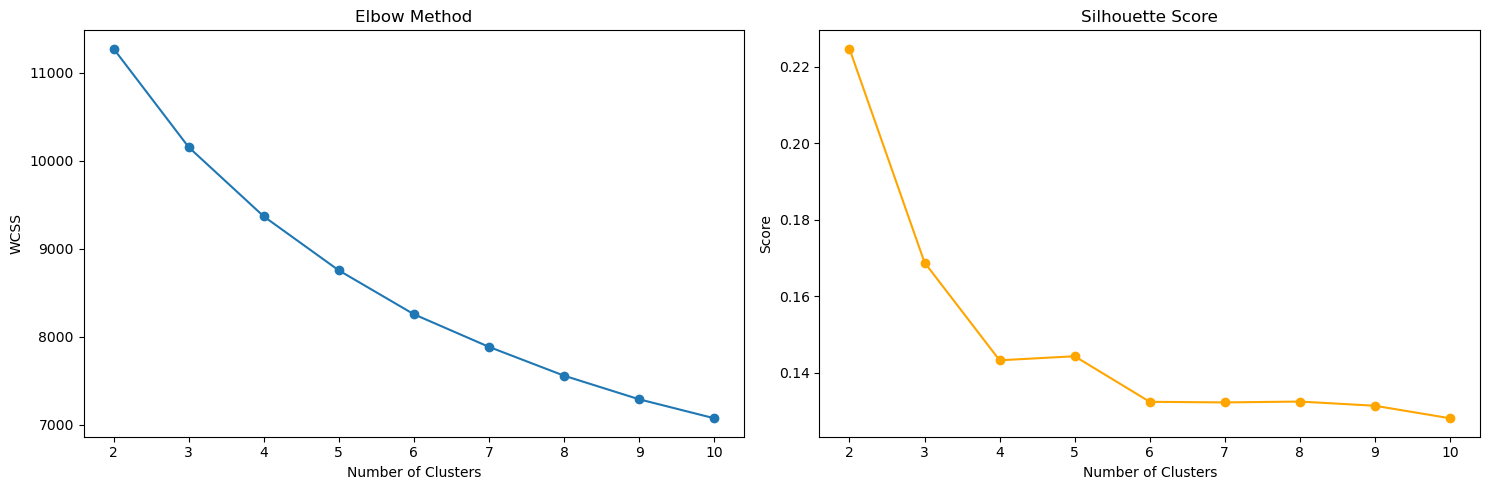

In [27]:
# Plot Elbow Method dan Silhouette Score
plt.figure(figsize=(15, 5))

# Elbow Method
plt.subplot(1, 2, 1)
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

# Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

In [28]:
# Analisis Cluster
print("PROFIL CLUSTER(RATA-RATA FITUR):\n")
print(df_subset.groupby('Cluster').mean(numeric_only=True))

PROFIL CLUSTER(RATA-RATA FITUR):

          Age  Total_Children  Total_Spending  Tenure_Days  Total_Store_Visits
Cluster                                                                       
0       58.20            0.52         1107.38       557.21               21.50
1       62.28            1.76          216.01       439.71               11.34
2       47.72            0.82          123.79       513.40                8.10


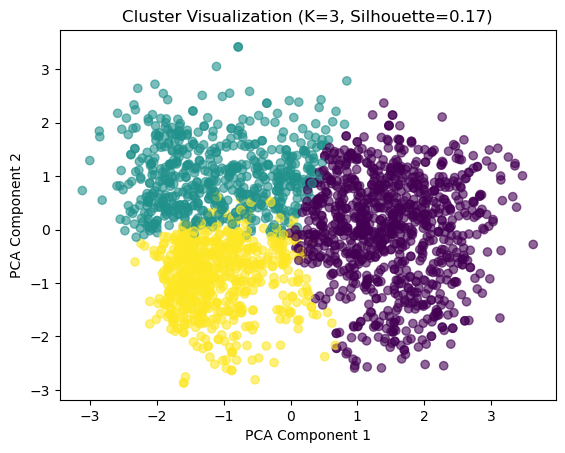

In [29]:
# Visualisasi PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(processed_data)

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title(f'Cluster Visualization (K={k_optimal}, Silhouette={silhouette_avg:.2f})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

### **Profil Cluster (Rata-Rata Fitur)**

Berikut adalah profil rata-rata fitur untuk setiap cluster yang dihasilkan:

| **Cluster** | **Age** | **Total_Children** | **Total_Spending** | **Tenure_Days** | **Total_Store_Visits** |
|-------------|---------|--------------------|--------------------|-----------------|------------------------|
| **0**       | 58,20   | 0,52               | 1107,38            | 557,21          | 21,50                  |
| **1**       | 62,28   | 1,76               | 216,01             | 439,71          | 11,34                  |
| **2**       | 47,72   | 0,82               | 123,79             | 513,40          | 8,10                   |

**Cluster 0**

Usia rata-rata: 58,2 tahun  
Jumlah anak: 0,52  
Pengeluaran total: 1107,38  
Tenure (lama berlangganan): 557,21 hari  
Total kunjungan toko: 21,50 kali  

Cluster ini cenderung memiliki usia yang lebih tua, sedikit anak, pengeluaran lebih tinggi, dan lebih sering mengunjungi toko. Mungkin mereka adalah **pelanggan yang sudah lama dan lebih loyal, serta lebih banyak berbelanja**.  

---

**Cluster 1**

Usia rata-rata: 62,28 tahun  
Jumlah anak: 1,76  
Pengeluaran total: 216,01  
Tenure: 439,71 hari  
Total kunjungan toko: 11,34 kali  

Cluster ini memiliki pelanggan yang lebih tua dengan lebih banyak anak, pengeluaran yang lebih rendah, dan lebih sedikit kunjungan ke toko. Mereka mungkin merupakan **pelanggan yang lebih berhati-hati dalam berbelanja dan tidak terlalu sering datang ke toko**.  

---

**Cluster 2**

Usia rata-rata: 47,72 tahun  
Jumlah anak: 0,82  
Pengeluaran total: 123,79  
Tenure: 513,40 hari  
Total kunjungan toko: 8,10 kali  

Cluster ini terdiri dari pelanggan yang sedikit lebih muda, dengan pengeluaran yang lebih rendah dan lebih sedikit kunjungan ke toko. Mereka bisa jadi **pelanggan yang lebih baru atau yang lebih jarang berbelanja**.

---

### **Interpretasi**:

Dengan tiga cluster, dapat mengidentifikasi segmen-segmen pelanggan berdasarkan pola usia, pengeluaran, dan aktivitas berbelanja mereka. Misalnya:

- Cluster 0: Pelanggan loyal yang sering berbelanja dan mengunjungi toko.
- Cluster 1: Pelanggan yang lebih tua, memiliki anak, tapi tidak terlalu sering berbelanja.
- Cluster 2: Pelanggan dengan pengeluaran lebih rendah dan aktivitas toko yang lebih rendah.

Ini dapat membantu dalam merancang strategi pemasaran yang lebih terarah untuk masing-masing segmen.

**Catatan:**
Fitur yang tidak ada di hasil clustering bukan berarti tidak relevan atau tidak berdampak sama sekali, tetapi bisa jadi bahwa fitur-fitur tersebut tidak cukup membedakan atau tidak memberikan kontribusi yang cukup besar pada proses pembentukan cluster.

In [30]:
# Analisis hubungan numerik dan kategorik
# Menghitung rata-rata untuk fitur numerik berdasarkan kategori 'Education'
print("Rata-rata Fitur Numerik Berdasarkan Education:")
df_education = df.groupby('Education')[['Age', 'Total_Children', 'Total_Spending', 'Tenure_Days', 'Total_Store_Visits']].mean()
print(df_education)
print("\n")

# Menghitung rata-rata untuk fitur numerik berdasarkan kategori 'Marital_Status'
print("Rata-rata Fitur Numerik Berdasarkan Marital Status:")
df_marital_status = df.groupby('Marital_Status')[['Age', 'Total_Children', 'Total_Spending', 'Tenure_Days', 'Total_Store_Visits']].mean()
print(df_marital_status)
print("\n")

# Menghitung rata-rata untuk fitur numerik berdasarkan kategori 'Favorite_Category'
print("Rata-rata Fitur Numerik Berdasarkan Favorite Category:")
df_favorite_category = df.groupby('Favorite_Category')[['Age', 'Total_Children', 'Total_Spending', 'Tenure_Days', 'Total_Store_Visits']].mean()
print(df_favorite_category)

Rata-rata Fitur Numerik Berdasarkan Education:
             Age  Total_Children  Total_Spending  Tenure_Days  \
Education                                                       
2n Cycle   52.63            0.89          454.33       540.65   
Basic      47.54            0.72           77.97       597.07   
Graduation 55.36            0.94          575.73       514.81   
Master     58.12            0.99          580.99       499.59   
PhD        58.89            1.00          643.06       493.73   

            Total_Store_Visits  
Education                       
2n Cycle                 13.69  
Basic                     7.02  
Graduation               14.83  
Master                   14.80  
PhD                      15.56  


Rata-rata Fitur Numerik Berdasarkan Marital Status:
                 Age  Total_Children  Total_Spending  Tenure_Days  \
Marital_Status                                                      
Absurd         50.00            0.00         1019.50       391.50   
Alone

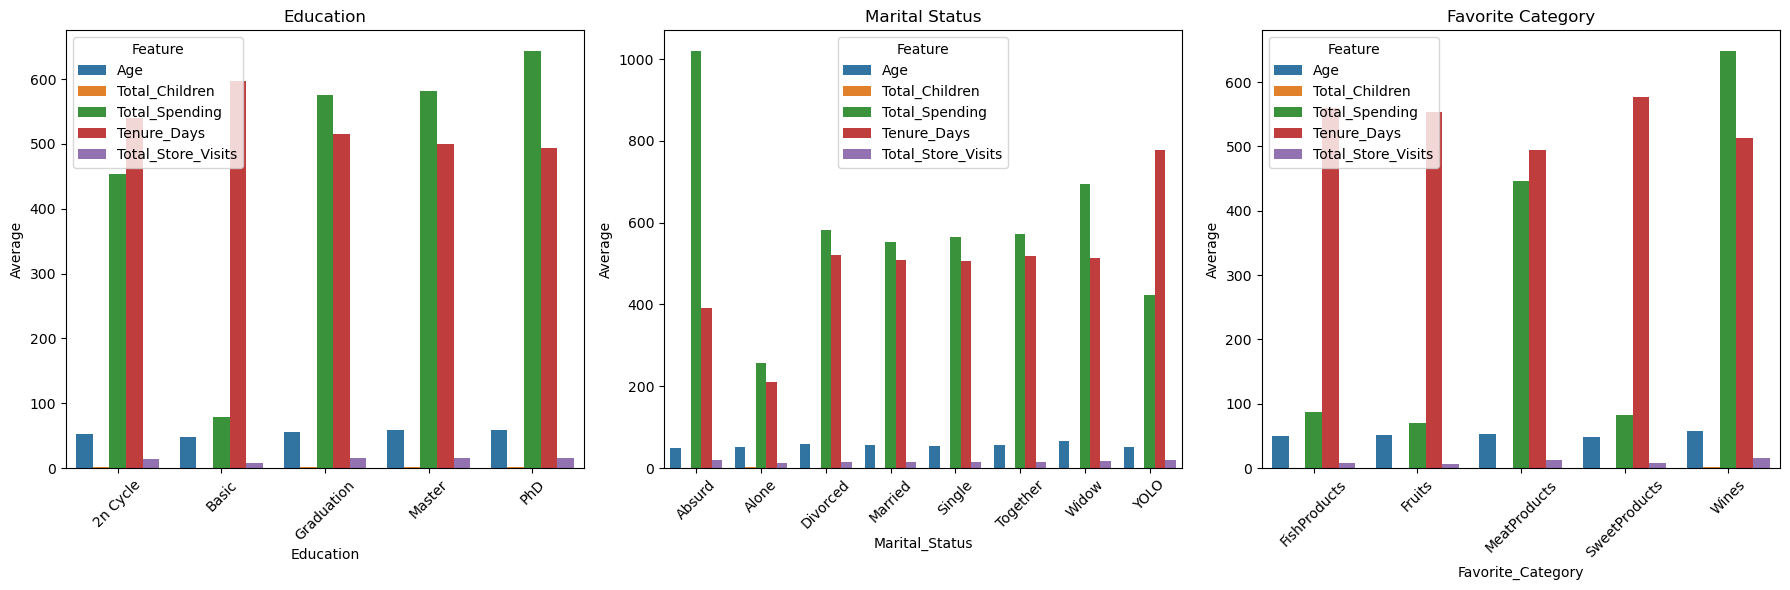

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot untuk Education
df_edu = df_education.reset_index()
sns.barplot(data=pd.melt(df_edu, id_vars='Education', var_name='Feature', value_name='Average'),
            x='Education', y='Average', hue='Feature', ax=axes[0])
axes[0].set_title('Education')
axes[0].tick_params(axis='x', rotation=45)

# Plot untuk Marital_Status (misal, df_marital)
df_marital = df_marital_status.reset_index()
sns.barplot(data=pd.melt(df_marital, id_vars='Marital_Status', var_name='Feature', value_name='Average'),
            x='Marital_Status', y='Average', hue='Feature', ax=axes[1])
axes[1].set_title('Marital Status')
axes[1].tick_params(axis='x', rotation=45)

# Plot untuk Favorite_Category (misal, df_favorite)
df_fav = df_favorite_category.reset_index()
sns.barplot(data=pd.melt(df_fav, id_vars='Favorite_Category', var_name='Feature', value_name='Average'),
            x='Favorite_Category', y='Average', hue='Feature', ax=axes[2])
axes[2].set_title('Favorite Category')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Berikut interpretasi singkat dan esensial berdasarkan rata-rata fitur numerik:

### **Education**  
- **2n Cycle**: Usia rata-rata 52,63, pengeluaran 454,33, dan kunjungan toko 13,69.  
- **Basic**: Usia terendah 47,54, pengeluaran sangat rendah (77,97), dan kunjungan toko paling sedikit (7,02).  
- **Graduation**: Usia 55,36, pengeluaran 575,73, dan kunjungan toko 14,83.  
- **Master**: Usia 58,12, pengeluaran 580,99, dan kunjungan toko 14,80.  
- **PhD**: Usia tertinggi 58,89, pengeluaran tertinggi 643,06, dan kunjungan toko tertinggi 15,56.  

**Interpretasi**: Tingkat pendidikan yang lebih tinggi (Master dan PhD) berkorelasi dengan usia, pengeluaran, dan kunjungan toko yang lebih tinggi, sedangkan kategori Basic menunjukkan nilai terendah.

---

### **Marital_Status**  
- **Absurd**: Usia 50,00, tanpa anak, pengeluaran sangat tinggi (1019,50), tenure rendah (391,50), dan kunjungan toko tinggi (19,50).  
- **Alone**: Usia 52,00, anak 1,67, pengeluaran rendah (256,67), tenure sangat rendah (210,33), dan kunjungan toko 13,33.  
- **Divorced**: Usia 58,59, 1 anak, pengeluaran 581,26, tenure 520,37, dan kunjungan toko 15,13.  
- **Married**: Usia 55,42, pengeluaran 553,42, dan kunjungan toko 14,74.  
- **Single**: Usia 53,43, pengeluaran 564,34, dan kunjungan toko 14,07.  
- **Together**: Usia 57,20, pengeluaran 572,10, dan kunjungan toko 14,68.  
- **Widow**: Usia tertinggi 66,44, pengeluaran 693,79, dan kunjungan toko 16,61.  
- **YOLO**: Usia 52,00, pengeluaran rendah (424,00), tenure tertinggi (779,00), dan kunjungan toko tinggi (19,00).  

**Interpretasi**: Mayoritas kategori (Divorced, Married, Single, Together) menunjukkan metrik yang seragam, dengan Married dan Together sebagai nilai dominan. Kategori outlier seperti Absurd dan YOLO memiliki nilai ekstrem dalam pengeluaran atau tenure.

---

### **Favorite_Category**  
- **FishProducts**: Usia 49,70, pengeluaran 86,74, tenure 560,21, dan kunjungan toko 7,37.  
- **Fruits**: Usia 50,63, pengeluaran terendah (70,73), tenure 552,97, dan kunjungan toko paling rendah (6,93).  
- **MeatProducts**: Usia 52,81, pengeluaran 446,61, tenure 494,67, dan kunjungan toko 12,63.  
- **SweetProducts**: Usia 48,03, pengeluaran 82,52, tenure 576,37, dan kunjungan toko 7,63.  
- **Wines**: Usia tertinggi 57,73, pengeluaran tertinggi 648,15, anak tertinggi 1,03, tenure 512,61, dan kunjungan toko tertinggi 15,96.  

**Interpretasi**: Pelanggan yang memilih Wines cenderung lebih tua dengan pengeluaran dan kunjungan toko yang lebih tinggi, sedangkan yang memilih Fruits dan SweetProducts menunjukkan metrik yang jauh lebih rendah secara keseluruhan.

In [32]:
# Crosstab untuk fitur Education
print("Crosstab untuk fitur Education:")
crosstab_edu = pd.crosstab(df_subset['Cluster'], df_subset['Education'], normalize='index')
print(crosstab_edu)
print("\n")

# Crosstab untuk fitur Marital_Status
print("Crosstab untuk fitur Marital_Status:")
crosstab_marital = pd.crosstab(df_subset['Cluster'], df_subset['Marital_Status'], normalize='index')
print(crosstab_marital)
print("\n")

# Crosstab untuk fitur Favorite_Category
print("Crosstab untuk fitur Favorite_Category:")
crosstab_fav = pd.crosstab(df_subset['Cluster'], df_subset['Favorite_Category'], normalize='index')
print(crosstab_fav)
print("\n")

Crosstab untuk fitur Education:
Education  2n Cycle  Basic  Graduation  Master  PhD
Cluster                                            
0              0.08   0.00        0.53    0.15 0.24
1              0.07   0.00        0.44    0.21 0.28
2              0.12   0.08        0.52    0.15 0.13


Crosstab untuk fitur Marital_Status:
Marital_Status  Absurd  Alone  Divorced  Married  Single  Together  Widow  \
Cluster                                                                     
0                 0.00   0.00      0.12     0.37    0.20      0.26   0.05   
1                 0.00   0.00      0.11     0.38    0.18      0.29   0.04   
2                 0.00   0.00      0.08     0.41    0.26      0.24   0.01   

Marital_Status  YOLO  
Cluster               
0               0.00  
1               0.00  
2               0.00  


Crosstab untuk fitur Favorite_Category:
Favorite_Category  FishProducts  Fruits  MeatProducts  SweetProducts  Wines
Cluster                                           

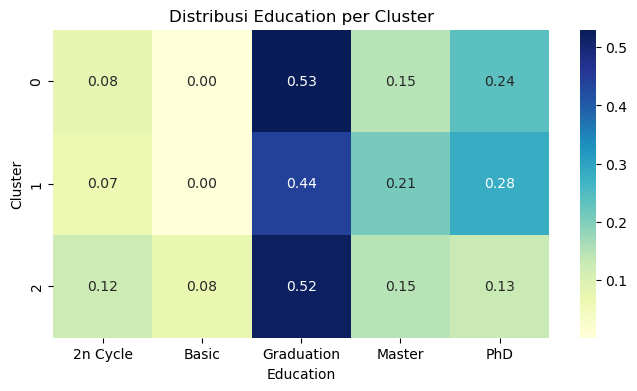

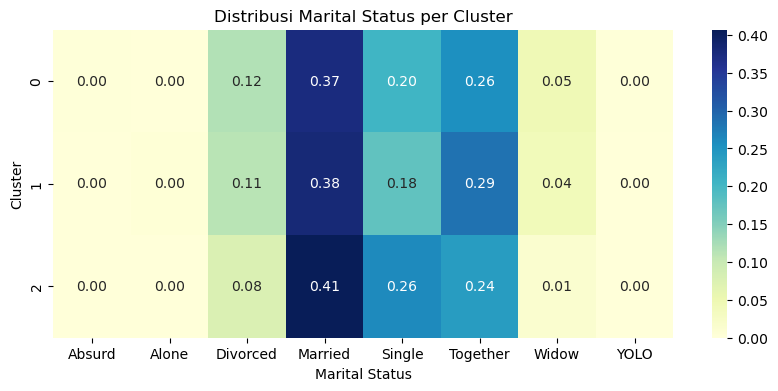

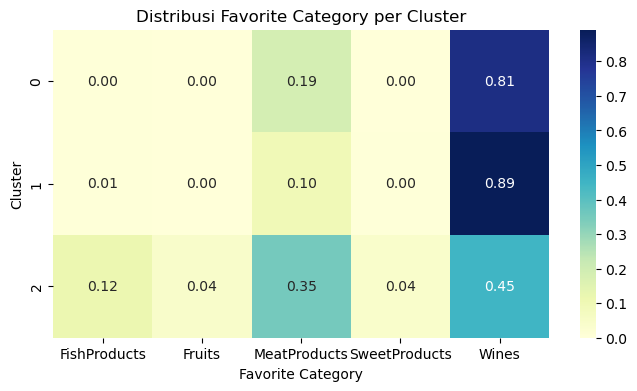

In [33]:
# Crosstab untuk Education
plt.figure(figsize=(8, 4))
sns.heatmap(crosstab_edu, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Distribusi Education per Cluster')
plt.ylabel('Cluster')
plt.xlabel('Education')
plt.show()

# Crosstab untuk Marital_Status
plt.figure(figsize=(10, 4))
sns.heatmap(crosstab_marital, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Distribusi Marital Status per Cluster')
plt.ylabel('Cluster')
plt.xlabel('Marital Status')
plt.show()

# Crosstab untuk Favorite_Category
plt.figure(figsize=(8, 4))
sns.heatmap(crosstab_fav, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Distribusi Favorite Category per Cluster')
plt.ylabel('Cluster')
plt.xlabel('Favorite Category')
plt.show()

Berikut interpretasi singkat dan esensial berdasarkan data crosstab:

**Education**

Cluster 0 & 1: Mayoritas berpendidikan "Graduation" (53% dan 44%) dengan proporsi "Master" (15% dan 21%) dan "PhD" (24% dan 28%) yang cukup tinggi, tanpa adanya kategori "Basic".
Cluster 2: Sedikit berbeda dengan penambahan kategori "Basic" (8%) dan "2n Cycle" (12%), serta proporsi "PhD" yang lebih rendah (13%) meski "Graduation" masih mendominasi (52%).

---

**Marital_Status**

Semua Cluster: Kategori "Married" mendominasi (37%-41%) diikuti oleh "Together" (24%-29%).
Cluster 2: Memiliki proporsi "Single" yang lebih tinggi (26%) dibandingkan Cluster 0 (20%) dan Cluster 1 (18%), serta sedikit lebih rendah pada "Divorced" (8% vs 11-12%).
Kategori "Absurd", "Alone", dan "YOLO" tidak muncul.

---

**Favorite_Category**

Cluster 0 & 1: Hampir seluruhnya menyukai "Wines" (81% dan 89%) dengan sisa minoritas cenderung ke "MeatProducts" (19% dan 10%).
Cluster 2: Lebih beragam; "Wines" hanya 45%, dengan kontribusi signifikan dari "MeatProducts" (35%) dan tambahan kategori "FishProducts" (12%), "Fruits" (4%), dan "SweetProducts" (4%).

---

Secara keseluruhan, perbedaan distribusi kategori menunjukkan bahwa:

1. Pendidikan: Cluster 0 dan 1 cenderung memiliki latar belakang pendidikan yang lebih tinggi (tidak ada Basic), sedangkan Cluster 2 menunjukkan keragaman pendidikan.
2. Status Pernikahan: Semua cluster mayoritas "Married/Together", tetapi Cluster 2 memiliki kecenderungan lebih tinggi untuk status "Single".
3. Preferensi Produk: Cluster 0 dan 1 sangat terfokus pada Wines, sedangkan Cluster 2 menunjukkan variasi preferensi yang lebih luas dengan kecenderungan ke MeatProducts.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [34]:
# Export data
df_subset.to_csv('segmented_marketing_campaign.csv', index=False)